# 텐서플로우 기본 요소 (1) - 변수, 텐서, 계산 그래프

## #01. 준비작업

### 패키지 가져오기

```shell
pip install --upgrade tensorflow
```

In [1]:
import tensorflow as tf
import numpy as np

## #02. 변수의 이해

프로그램에서의 변수와는 개념이 다르다. 

머신러닝의 학습을 위한 가설이 $f(x) = W * x + b$ 라면, 입력 데이터가 $x$일 때 $W$와 $b$는 텐서플로우가 학습을 통해 스스로 구해야 하는 값이다.

이를 변수(Variable)라고 하는데, 변수형은 Variable 타입의 객체로 생성된다.

변수는 생성할 때 그 값에 따라 압묵적 타입과 명시적 타입으로 구분된다.

### 암묵적 타입의 변수 생성하기


In [2]:
x = tf.Variable(123)
tf.print(x)

y = tf.Variable(x + 100)
tf.print(y)

123
223


### 명시적 타입의 변수 생성하기

`tf.Variable()` 함수에 데이터 타입을 의미하는 dtype 파라미터를 전달한다.

In [3]:
x = tf.Variable(123.45, dtype=tf.float32)
tf.print(x)

123.45


### 데이터 타입의 종류

### 데이터 타입 종류

| datatype | description |
|---|---|
| [tf.float16](https://www.tensorflow.org/api_docs/python/tf#float16) | 16-bit half-precision floating-point. |
| [tf.float32](https://www.tensorflow.org/api_docs/python/tf#float32) | 32-bit single-precision floating-point. |
| [tf.float64](https://www.tensorflow.org/api_docs/python/tf#float64) | 64-bit double-precision floating-point. |
| [tf.bfloat16](https://www.tensorflow.org/api_docs/python/tf#bfloat16) | 16-bit truncated floating-point. |
| [tf.complex64](https://www.tensorflow.org/api_docs/python/tf#complex64) | 64-bit single-precision complex. |
| [tf.complex128](https://www.tensorflow.org/api_docs/python/tf#complex128) | 128-bit double-precision complex. |
| [tf.int8](https://www.tensorflow.org/api_docs/python/tf#int8) | 8-bit signed integer. |
| [tf.uint8](https://www.tensorflow.org/api_docs/python/tf#uint8) | 8-bit unsigned integer. |
| [tf.uint16](https://www.tensorflow.org/api_docs/python/tf#uint16) | 16-bit unsigned integer. |
| [tf.uint32](https://www.tensorflow.org/api_docs/python/tf#uint32) | 32-bit unsigned integer. |
| [tf.uint64](https://www.tensorflow.org/api_docs/python/tf#uint64) | 64-bit unsigned integer. |
| [tf.int16](https://www.tensorflow.org/api_docs/python/tf#int16) | 16-bit signed integer. |
| [tf.int32](https://www.tensorflow.org/api_docs/python/tf#int32) | 32-bit signed integer. |
| [tf.int64](https://www.tensorflow.org/api_docs/python/tf#int64) | 64-bit signed integer. |
| [tf.bool](https://www.tensorflow.org/api_docs/python/tf#bool) | Boolean. |
| [tf.string](https://www.tensorflow.org/api_docs/python/tf#string) | String. |
| [tf.qint8](https://www.tensorflow.org/api_docs/python/tf#qint8) | Quantized 8-bit signed integer. |
| [tf.quint8](https://www.tensorflow.org/api_docs/python/tf#quint8) | Quantized 8-bit unsigned integer. |
| [tf.qint16](https://www.tensorflow.org/api_docs/python/tf#qint16) | Quantized 16-bit signed integer. |
| [tf.quint16](https://www.tensorflow.org/api_docs/python/tf#quint16) | Quantized 16-bit unsigned integer. |
| [tf.qint32](https://www.tensorflow.org/api_docs/python/tf#qint32) | Quantized 32-bit signed integer. |
| [tf.resource](https://www.tensorflow.org/api_docs/python/tf#resource) | Handle to a mutable resource. |
| [tf.variant](https://www.tensorflow.org/api_docs/python/tf#variant) | Values of arbitrary types. |


## #03. 텐서(Tensor)

텐서란 배열의 집합을 의미하며 배열의 차수에 따라 불리는 이름이 바뀐다.

파이썬에서는 텐서를 numpy array로 표현한다.

| 이름 | 설명 |
|---|---|
| Tensor | 수학적인 개념으로 데이터의 배열을 의미. |
| Rank | 텐서의 차원(Dimension). numpy의 shape값으로 확인 가능 |

### 배열의 종류

| Rank | Type | 설명 | Example |
|--|--|--|--|
| 0 | scalar | 랭크가 0인 배열. 원소가 1개인 1차 배열 | [1] |
| 1 | vector | 원소가 2개 이상인 1차 배열 | [1, 2] |
| 2 | matrix | 2차 배열 | [ [1, 2], [3, 4] ] |
| 3 | tensor | 3차 배열 | [ [ [-1, -2], [1, 2] ], [ [-1, 0], [1, 0] ] ] |
| n | n-tensor | n차 배열 |

![tensor](res/tensor.png)

### 랭크가 0인 배열 → 스칼라

In [4]:
a = 100
ts1 = np.array(a)
print(ts1.shape)
ts1

()


array(100)

### 랭크가 1인 배열 → 백터

In [5]:
b = [1, 2, 3]
ts2 = np.array(b)
print(ts2.shape)
ts2

(3,)


array([1, 2, 3])

### 랭크가 2인 배열 → 행렬(matrix)

In [6]:
c = [[10, 20, 30], [100, 200, 300]]
ts3 = np.array(c)
print(ts3.shape)
ts3

(2, 3)


array([[ 10,  20,  30],
       [100, 200, 300]])

### 랭크가 3인 배열 → 텐서

In [7]:
hello = [[-1, -2, -3], [1, 2, 3]]
world = [[-1, 0, 1], [1, 0, -1]]
d = [hello, world]
ts4 = np.array(d)
print(ts4.shape)
ts4

(2, 2, 3)


array([[[-1, -2, -3],
        [ 1,  2,  3]],

       [[-1,  0,  1],
        [ 1,  0, -1]]])

## #03. 계산 그래프 (이진 그래프)
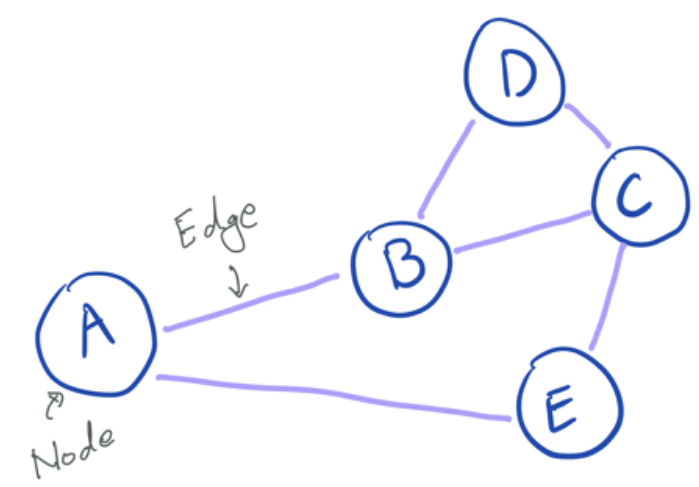

* Computational Graph
* 컴퓨터 공학에서 정의하는 노드(Node)와 엣지(Edge)로 이루어진 자료구조.
* 텐서들이 계산 그래프 구조를 통해 노드에서 노드로 이동한다.
* 텐서플로우 라이브러리는 그래프 구조를 먼저 정의하고, 정의한 그래프에 실제 텐서들을 흘려보내도록 디자인 되었다.

### 명시적 타입을 갖는 노드 정의

`print()` 함수로 출력할 경우 노드의 정보만 출력될 뿐 실제 값이 출력되지는 않는다.

실제 값을 확인하기 위해서는 `tf.print()` 함수를 사용해야 한다.

In [8]:
node1 = tf.constant(3.0, dtype=tf.float32, name="hello")
print(node1)
tf.print(node1)

tf.Tensor(3.0, shape=(), dtype=float32)
3


### 암묵적 타입을 갖는 노드 정의

In [9]:
node2 = tf.constant(4.0, name="world")
print(node2)
tf.print(node2)

tf.Tensor(4.0, shape=(), dtype=float32)
4


### 두개의 노드의 값을 더하는 연산을 수행하는 node3를 정의

In [10]:
node3 = tf.add(node1, node2)
print(node3)
tf.print(node3)

tf.Tensor(7.0, shape=(), dtype=float32)
7
